In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import csv 
import numpy as np

Let's answer these 4 questions:
1. Highest correlation characteristic(s)
2. Biggest change over years
3. Characteristic(s) that impact that change
4. Surprising outliers

1. Highest correlation characteristic(s)
 - correlation for each column
 - correlation for each combo of columns, 7 columns
    - 5913 possibilities, maybe, if we did math right 7! + 6! + 5! + ... + 1! = 5913
 - produce a matplotlib graph of the column, or combo of columns, with highest correlation

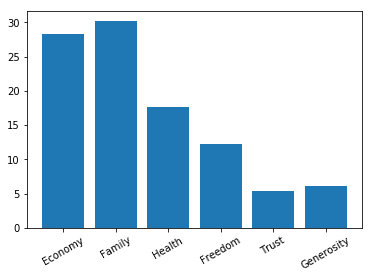

In [33]:
# Create a list of the filenames of the datasets.
dataSets = [
    'world-happiness-report/2015.csv',
    'world-happiness-report/2016.csv',
    'world-happiness-report/2017.csv'
           ]

# The column names in the csv files are inconsistent.
# Create a list of common column names for two datasets.
factorNames2015and2016 = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
                         ]
# Create a list of column names for the third dataset.
factorNames2017 = [
    'Economy..GDP.per.Capita.',
    'Family',
    'Health..Life.Expectancy.',
    'Freedom',
    'Generosity',
    'Trust..Government.Corruption.'
                  ]
# Create a list of the lists of column names.
factorsByYear = [
    factorNames2015and2016,
    factorNames2015and2016,
    factorNames2017
                ]

# Create a list to hold lists of column averages per dataset.
threeAverages = [[], [], []]

# Iterate over the datasets, finding the averages per column.
for i in range(len(dataSets)):
    frame = pd.read_csv(dataSets[i])
    factorsByUN = factorsByYear[i]

    for factor in factorsByUN:
        columnData = list(frame[factor])
        average = sum(columnData) / len(columnData)
        threeAverages[i].append(average)

# Determine the averages of the averages and put them in a list.
averages = []
quantityAves = len(factorNames2015and2016)
for i in range(quantityAves):
    averages.append(
                       (
                           threeAverages[0][i] + 
                           threeAverages[1][i] + 
                           threeAverages[2][i]
                       ) / quantityAves
                   )

# Determine the amount of happiness accounted for by each column.
averagePercents = []
happinessSum = sum(averages)
for i in range(len(averages)):
    # Calculate the national happiness percentage of the column.
    averagePercents.append(averages[i] / happinessSum * 100)

# Abbreviate the names of the factors for readability.
xLabels = []
for factor in factorNames2015and2016:
    xLabels.append(factor.split()[0])

indices = np.arange(len(factorNames2015and2016))
plt.bar(indices, averagePercents)
plt.xticks(indices, xLabels, rotation = 30)
# plt.xlabel = ("Nationally Significant Factors")
# plt.ylabel = ("UN Designated Percent of Relevance to Happiness")
plt.show()


2. Biggest change over years
 - Programmatically find the country who wins "most improved" award
 - graph it

3. Characteristic(s) that impact that change
 - using methods from question 1, find and graph what way most likely to cause the change

4. Surprising outliers
 - Anomolous countries, e.g., Costa Rica, that don't fit the trend